In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

# TODO 
- RF specific:
    - Entropy vs gini loss etc
- feature importance
- imputation
- multi class correlation
- multi class classification
- cateogorical encoding - and dimensionality reduction? PCA ?


Other options:
---
- CatBoost or HistogramGradientBoosting
  - Constraints - how do RFs perform with large training sets (training time)
  - Support for Categorical variables?
- Does SHAP work with multi-class problems?

- Understand Gradient Boosting, Understand LightGBM, Understand Catboost


In [8]:
iris = datasets.load_iris()

In [9]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris['data'].shape

(150, 4)

In [14]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [15]:
df['target'] = iris['target']

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


[Text(0.5, 0, 'sepal length (cm)'), Text(0, 0.5, 'sepal width (cm)')]

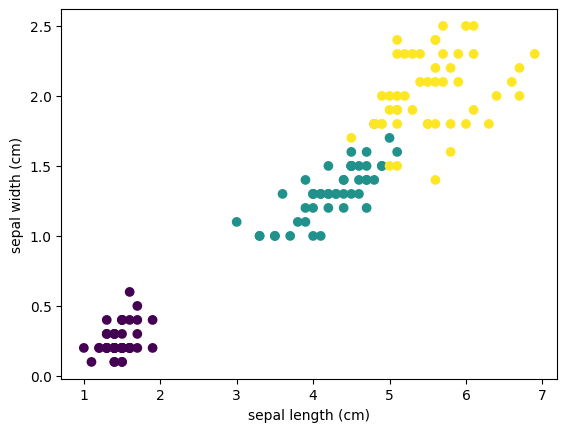

In [17]:
# Class correlation?

_, ax = plt.subplots()
scatter = ax.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'])
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

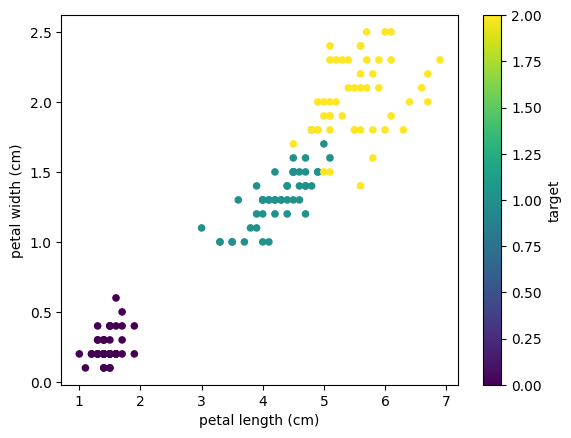

In [18]:
df.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='target', colormap='viridis')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [52]:
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True, stratify=df['target'])

In [53]:
train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
98,5.1,2.5,3.0,1.1,1
68,6.2,2.2,4.5,1.5,1
19,5.1,3.8,1.5,0.3,0
143,6.8,3.2,5.9,2.3,2
99,5.7,2.8,4.1,1.3,1
...,...,...,...,...,...
37,4.9,3.6,1.4,0.1,0
79,5.7,2.6,3.5,1.0,1
33,5.5,4.2,1.4,0.2,0
94,5.6,2.7,4.2,1.3,1


In [54]:
train.loc[:, df.columns != 'target']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
19,5.1,3.8,1.5,0.3
143,6.8,3.2,5.9,2.3
99,5.7,2.8,4.1,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
79,5.7,2.6,3.5,1.0
33,5.5,4.2,1.4,0.2
94,5.6,2.7,4.2,1.3


In [55]:
train['target']

98     1
68     1
19     0
143    2
99     1
      ..
37     0
79     1
33     0
94     1
3      0
Name: target, Length: 105, dtype: int64

In [56]:
clf = RandomForestClassifier(min_weight_fraction_leaf=0.02, random_state=42)

In [57]:
clf.fit(train.loc[:, df.columns != 'target'], train['target'])

RandomForestClassifier(min_weight_fraction_leaf=0.02, random_state=42)

In [68]:
# Accuracy on train set
clf.score(train.loc[:, df.columns != 'target'], train['target'])

0.9714285714285714

In [58]:
# Test Accuracy
clf.score(test.loc[:, df.columns != 'target'], test['target'])

0.8888888888888888

In [59]:
predictions = clf.predict(test.loc[:, df.columns != 'target'])

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [61]:
cm = confusion_matrix(test['target'], predictions)

In [62]:
cm

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  4, 11]])

In [63]:
disp = ConfusionMatrixDisplay(cm)

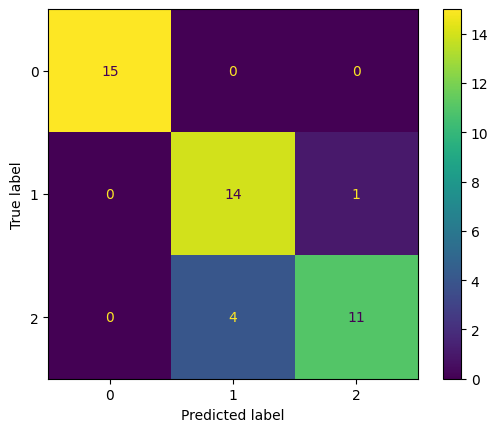

In [64]:
disp.plot()

In [67]:
clf.feature_importances_

array([0.12284532, 0.01476266, 0.40918962, 0.4532024 ])

In [73]:
train.columns[train.columns != 'target']

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

<Axes: >

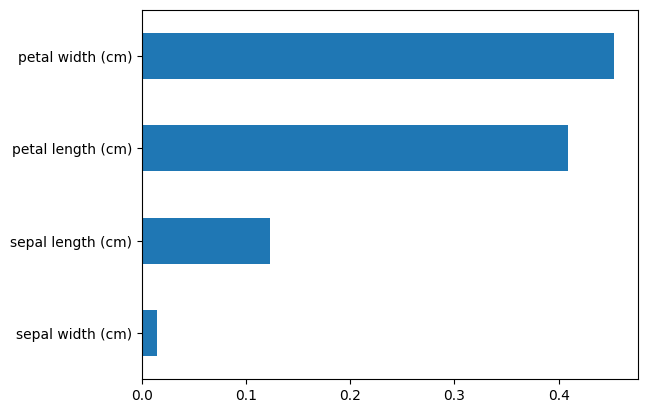

In [76]:
pd.Series(clf.feature_importances_, index=train.columns[train.columns != 'target']).sort_values(ascending=True).plot.barh()

In [77]:
from sklearn.inspection import permutation_importance


In [69]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.02,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}